In [32]:
import matplotlib.pyplot as plt
import numpy as np
import csv

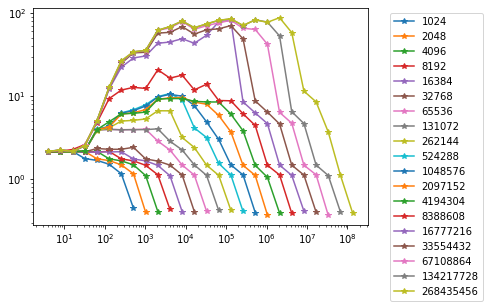

In [162]:
with open('pointer_chasing_results_clang_O1_native.txt') as csvfile:
    reader = csv.reader(csvfile, skipinitialspace=True)
    header = np.array(next(reader))
    max_row_length = len(header) - 1
    
    for index, row in enumerate(reader):
        # Add missing values as NaN
        # https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/masked_demo.html
        row = np.append(row, np.zeros(max_row_length - len(row) + 1) + np.nan)

        # Convert rows to the correct data type
        x = header[1:].astype(float)
        y = row[1:].astype(float)
        plt.loglog(x, y, marker='*', label=row[0])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [186]:
# Test: pandas instead of csv.reader
import pandas as pd
df = pd.read_csv("pointer_chasing_results_clang_O1_native.txt", skipinitialspace=True)
df.columns.values

array(['N', '4', '8', '16', '32', '64', '128', '256', '512', '1024',
       '2048', '4096', '8192', '16384', '32768', '65536', '131072',
       '262144', '524288', '1048576', '2097152', '4194304', '8388608',
       '16777216', '33554432', '67108864', '134217728', '268435456'],
      dtype=object)

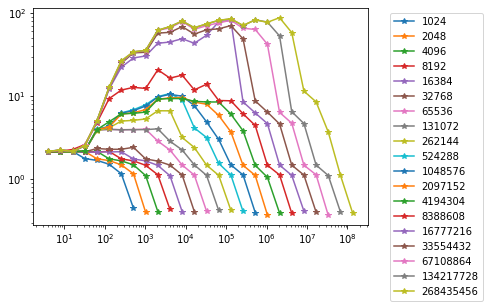

In [195]:
header = df.columns.values

for index, row in enumerate(df.values):
    x = header[1:].astype(float)
    y = row[1:]
    plt.loglog(x, y, marker='*', label=row[0].astype(int))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()